In [4]:
import glob
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Success

In [5]:
#read image
filename = glob.glob('../images/0.jpg')[-1]
bgr = cv2.imread(filename)
rgb = cv2.cvtColor(bgr,cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(bgr,cv2.COLOR_BGR2HSV)
hls=cv2.cvtColor(bgr,cv2.COLOR_BGR2HLS)

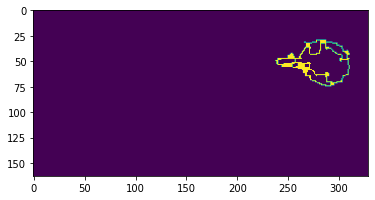

In [6]:
edged = cv2.Canny(hsv[:,:,0], 50, 100)
edged = cv2.dilate(edged, None, iterations=1)
edged = cv2.erode(edged, None, iterations=1)
plt.imshow(edged)

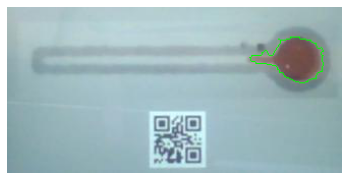

In [157]:
# find contours in the edge map
cnts = cv2.findContours(edged, cv2.RETR_EXTERNAL,
                        cv2.CHAIN_APPROX_SIMPLE)
import imutils
cnts = imutils.grab_contours(cnts)
cnt_img = cv2.drawContours(rgb,cnts, 0, (0,255,0),1)

# plt.figure(figsize=(20,12))
plt.axis('off')
plt.imshow(cnt_img)

In [133]:
from scipy.spatial import ConvexHull
from scipy.spatial.distance import cdist

points = cnts[0].reshape(-1,2)

# Returned 420 points in testing
hull = ConvexHull(points)

# Extract the points forming the hull
hullpoints = points[hull.vertices,:]

# Naive way of finding the best pair in O(H^2) time if H is number of points on
# hull
hdist = cdist(hullpoints, hullpoints, metric='euclidean')

# Get the farthest apart points
bestpair = np.unravel_index(hdist.argmax(), hdist.shape)

point1 = tuple(hullpoints[bestpair[0]])
point2 = tuple(hullpoints[bestpair[1]])
length = cdist(hullpoints[bestpair[0]].reshape(1,2),hullpoints[bestpair[1]].reshape(1,2),metric='euclidean')
length = length[0][0]
#Print them
print([length,point1,point2])

[72.44308110509934, (310, 57), (238, 49)]


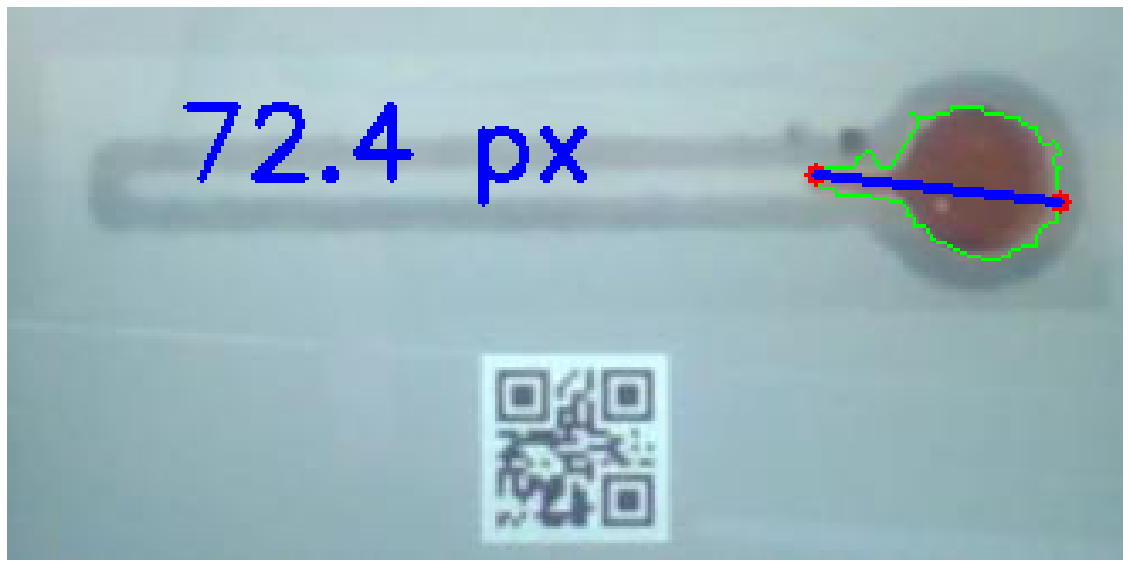

In [155]:
len_orig = rgb.copy()
# dist_img = cv2.drawContours(orig, cnts, -1, (0,255,0), 3)
cv2.circle(len_orig,point1,3,(255,0,0),-1)
cv2.circle(len_orig,point2,3,(255,0,0),-1)
cv2.line(len_orig,point1,point2,(0,0,255),2,-1)
midptX = int((point1[0]+point2[0])/2)
midptY = int((point1[1]+point2[1])/2)
# cv2.circle(len_orig,(midptX,midptY),20,(0,0,255),-1)
cv2.putText(len_orig, f"{length:.1f} px",
    (50,50), cv2.FONT_HERSHEY_SIMPLEX,
    1, (0,0,255), 2)
plt.figure(figsize=(20,12))
plt.axis('off')
plt.imshow(len_orig)

# Other stuff

(<matplotlib.axes._subplots.AxesSubplot at 0x7fcddec40d30>,
 <matplotlib.image.AxesImage at 0x7fcddebd6e80>)

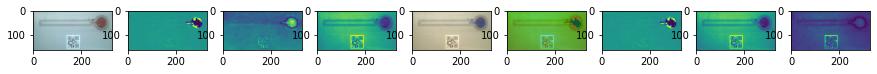

In [104]:
plt.figure(figsize=(15,15))
i = 9
plt.subplot(1,i,1),plt.imshow(rgb)
plt.subplot(1,i,2),plt.imshow(hsv[:,:,0])
plt.subplot(1,i,3),plt.imshow(hsv[:,:,1])
plt.subplot(1,i,4),plt.imshow(hsv[:,:,2])
plt.subplot(1,i,5),plt.imshow(bgr)
plt.subplot(1,i,6),plt.imshow(hls)
plt.subplot(1,i,7),plt.imshow(hls[:,:,0])
plt.subplot(1,i,8),plt.imshow(hls[:,:,1])
plt.subplot(1,i,9),plt.imshow(hls[:,:,2])

In [91]:
def KMeansSeg(img,k):
    if len(img.shape)>2:
        vectorized = img.reshape((-1,3))
    else:
        vectorized = img.reshape((-1,1))
    vectorized = np.float32(vectorized)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    K = k
    attempts=10
    ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
    center = np.uint8(center)
    res = center[label.flatten()]
    seg_img = res.reshape((img.shape))
    return seg_img

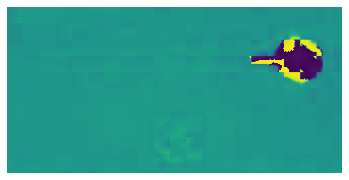

In [159]:
plt.axis('off')
plt.imshow(hsv[:,:,0])

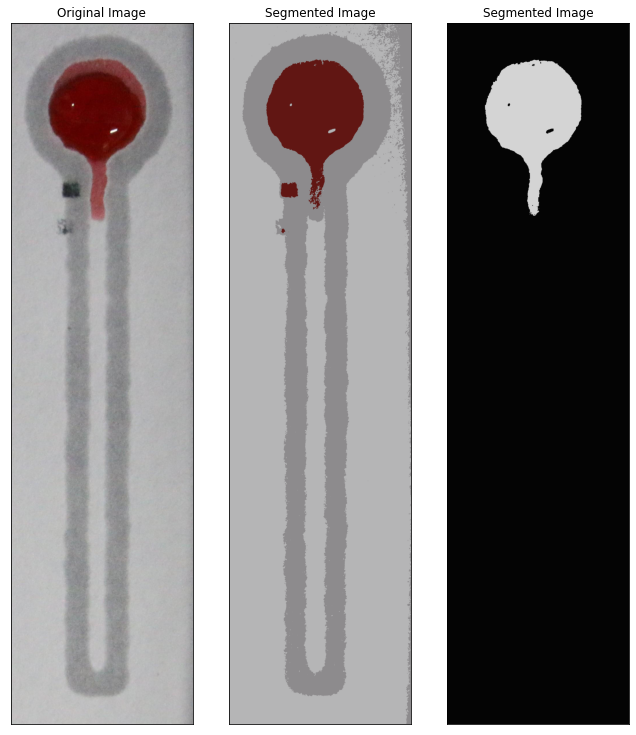

In [5]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,4,1),plt.imshow(rgb)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

rgb_seg = KMeansSeg(rgb,k=3)
plt.subplot(1,4,2),plt.imshow(rgb_seg)
plt.title('Segmented Image' ), plt.xticks([]), plt.yticks([])

hsv_seg = KMeansSeg(hsv,k=2)
plt.subplot(1,4,3),plt.imshow(hsv_seg)
plt.title('Segmented Image' ), plt.xticks([]), plt.yticks([])

plt.show()

1.7046504020690918


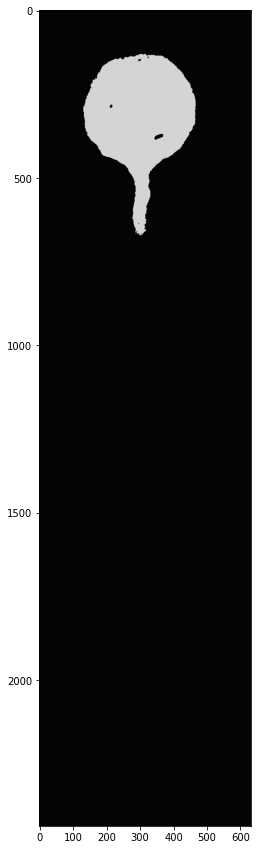

In [6]:
import time 
start = time.time()
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
hsv_seg = KMeansSeg(hsv,k=2)
plt.imshow(hsv_seg)
print(time.time()-start)
# plt.title('Segmented Image' )